### First take the image from the RGB Oak-D camera and then convert it to an edge detected image. 

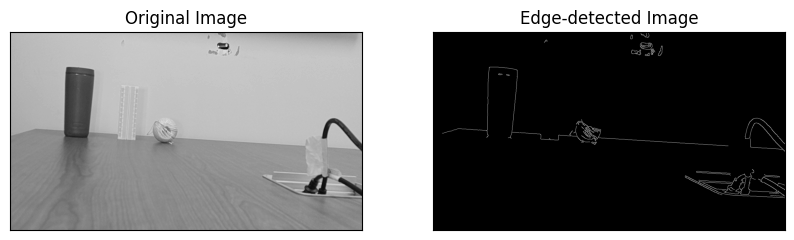

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
file_path = 'picture0_light.jpg'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Using Canny edge detector to simulate an event camera output
edges = cv2.Canny(image, 100, 200)

# Save the edge-detected image
edge_file_path = 'edge_detected_picture0.png'
cv2.imwrite(edge_file_path, edges)

# Display the original and edge-detected image
plt.figure(figsize=(10, 5))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge-detected Image'), plt.xticks([]), plt.yticks([])


plt.show()


##### Looks like that picture, might not have as much features for us to have a good similarity score. So we will just use ORB features as SIFT and SURF are not open source anymore and we will take fist 30 matches from the original image to the event camera image. 

In [8]:
from cv2 import ORB_create, BFMatcher, NORM_HAMMING, drawMatches, imread, cvtColor, COLOR_BGR2GRAY, imwrite

# Load the new reference image
new_reference_image_path = 'picture0_light.jpg'
new_reference_image = imread(new_reference_image_path, cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = ORB_create()

# Find the keypoints and descriptors with ORB for the new reference image
keypoints_new_ref, descriptors_new_ref = orb.detectAndCompute(new_reference_image, None)

# Load the event camera image
event_image_path = 'event_image_1k_new.png'  # Replace with your event image path
event_image = imread(event_image_path, cv2.IMREAD_GRAYSCALE)

# Find the keypoints and descriptors with ORB for the event camera image
keypoints_event, descriptors_event = orb.detectAndCompute(event_image, None)

# Initialize the matcher
matcher = BFMatcher(NORM_HAMMING, crossCheck=True)

# Match descriptors and sort them in the order of their distance
matches_new_ref_event = matcher.match(descriptors_new_ref, descriptors_event)
matches_new_ref_event = sorted(matches_new_ref_event, key=lambda x: x.distance)

# Draw the first 50 matches
num_matches_to_draw = min(10, len(matches_new_ref_event))
img_matches_new_ref_event_30 = drawMatches(new_reference_image, keypoints_new_ref, 
                                           event_image, keypoints_event, matches_new_ref_event[:num_matches_to_draw], None, flags=2)

# Save the matched image
matched_new_ref_image_30_path = 'matched_new_ref_image_new.png'
imwrite(matched_new_ref_image_30_path, img_matches_new_ref_event_30)

True

In [34]:
from cv2 import ORB_create, BFMatcher, NORM_HAMMING, drawMatches, imread, cvtColor, COLOR_BGR2GRAY, imwrite

# Load the new reference image
new_reference_image_path = 'picture0.jpg'
new_reference_image = imread(new_reference_image_path, cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = ORB_create()

# Find the keypoints and descriptors with ORB for the new reference image
keypoints_new_ref, descriptors_new_ref = orb.detectAndCompute(new_reference_image, None)

# Load the event camera image
event_image_path = 'event_image.png'  # Replace with your event image path
event_image = imread(event_image_path, cv2.IMREAD_GRAYSCALE)
event_image = cv2.fastNlMeansDenoising(event_image, None, 40, 7, 21)
# Find the keypoints and descriptors with ORB for the event camera image
keypoints_event, descriptors_event = orb.detectAndCompute(event_image, None)

# Initialize the matcher
matcher = BFMatcher(NORM_HAMMING, crossCheck=True)

# Match descriptors and sort them in the order of their distance
matches_new_ref_event = matcher.match(descriptors_new_ref, descriptors_event)
matches_new_ref_event = sorted(matches_new_ref_event, key=lambda x: x.distance)

# Draw the first 50 matches
num_matches_to_draw = min(10, len(matches_new_ref_event))
img_matches_new_ref_event_30 = drawMatches(new_reference_image, keypoints_new_ref, 
                                           event_image, keypoints_event, matches_new_ref_event[:num_matches_to_draw], None, flags=2)

# Save the matched image
matched_new_ref_image_30_path = 'matched_new_ref_image_denoised.png'
imwrite(matched_new_ref_image_30_path, img_matches_new_ref_event_30)

True

In [10]:
from cv2 import ORB_create, BFMatcher, NORM_HAMMING, drawMatches, imread, cvtColor, COLOR_BGR2GRAY, imwrite

# Load the new reference image
new_reference_image_path = 'picture0.jpg'
new_reference_image = imread(new_reference_image_path, cv2.IMREAD_GRAYSCALE)
# get size of the image
height, width = new_reference_image.shape[:2]
#edges = cv2.Canny(new_reference_image, 100, 200)
# Initialize ORB detector
orb = ORB_create()

# Find the keypoints and descriptors with ORB for the new reference image
keypoints_new_ref, descriptors_new_ref = orb.detectAndCompute(new_reference_image, None)

# Load the event camera image
event_image_path = 'event_image.png'  # Replace with your event image path
event_image = imread(event_image_path, cv2.IMREAD_GRAYSCALE)
# resize the image
event_image = cv2.resize(event_image, (width, height))
event_image = cv2.fastNlMeansDenoising(event_image, None, 20, 7, 21)
#event_edges = cv2.Canny(event_image, 800, 1200)

# Find the keypoints and descriptors with ORB for the event camera image
keypoints_event, descriptors_event = orb.detectAndCompute(event_image, None)

# Initialize the matcher
matcher = BFMatcher(NORM_HAMMING, crossCheck=True)

# Match descriptors and sort them in the order of their distance
matches_new_ref_event = matcher.match(descriptors_new_ref, descriptors_event)
matches_new_ref_event = sorted(matches_new_ref_event, key=lambda x: x.distance)

# Draw the first 50 matches
num_matches_to_draw = min(10, len(matches_new_ref_event))
img_matches_new_ref_event_30 = drawMatches(new_reference_image, keypoints_new_ref, 
                                           event_image, keypoints_event, matches_new_ref_event[:num_matches_to_draw], None, flags=2)

# Save the matched image
matched_new_ref_image_30_path = 'matched_new_image_1.png'
imwrite(matched_new_ref_image_30_path, img_matches_new_ref_event_30)


True

In [1]:
# open the picture_0_light.jpg

import matplotlib.pyplot as plt
import cv2
# Load the image
file_path = 'picture0_light.jpg'
image = plt.imread(file_path)

# convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#save the grayscale image
gray_file_path = 'grayscale_picture0_light.jpg'
cv2.imwrite(gray_file_path, gray_image)

True

In [3]:
# open the picture_0_light.jpg

import matplotlib.pyplot as plt
import cv2
# Load the image
file_path = 'event_image.png'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

#save the grayscale image
gray_file_path = 'grayscale_event_image.jpg'
cv2.imwrite(gray_file_path, image)

True

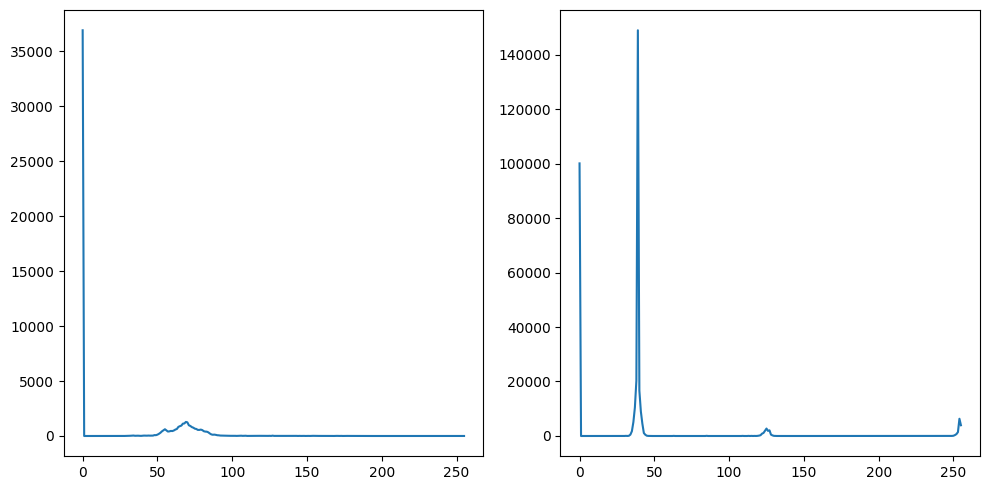

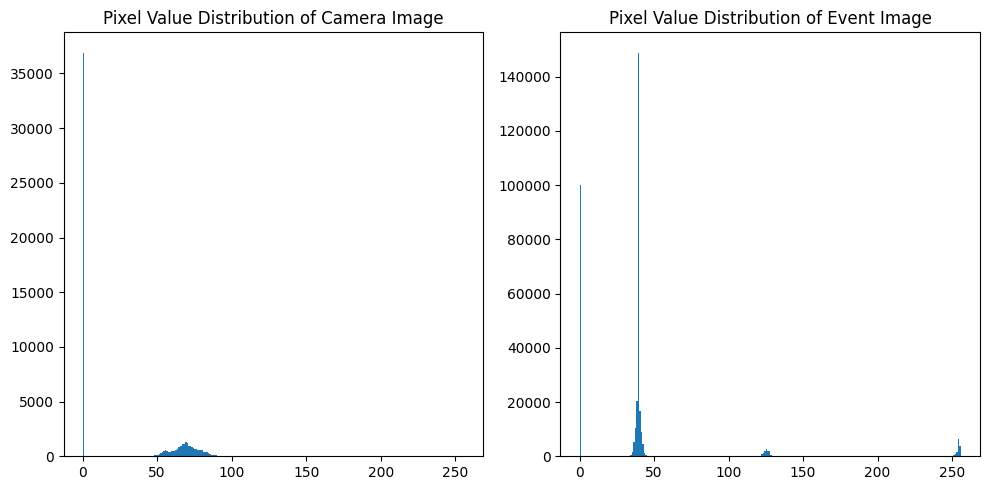

In [18]:
# open the cropped_flask_cam_domain.png and the cropped_flask_event_domain.png

import matplotlib.pyplot as plt
import cv2

# Load the image
file_path_cam = 'cropped_flask_cam_domain.png'
image_cam = cv2.imread(file_path_cam, cv2.IMREAD_GRAYSCALE)

file_path_event = 'cropped_flask_event_domain.png'
image_event = cv2.imread(file_path_event, cv2.IMREAD_GRAYSCALE)

# calculate the histrogram of the image_cam and image_event and plot them 
hist_cam = cv2.calcHist([image_cam], [0], None, [256], [0, 256])
hist_event = cv2.calcHist([image_event], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(121), plt.plot(hist_cam)
#plt.title('Histogram of Camera Frame') 
# put the title below the plot
plt.subplot(122), plt.plot(hist_event)
# put the title below the plot
plt.tight_layout()
plt.savefig('figures/histogram_cam_event.png')
plt.show()

# calculate the distribution of the pixel values of the image_cam and image_event and plot them
plt.figure(figsize=(10, 5))

plt.subplot(121), plt.hist(image_cam.ravel(), 256, [0, 256])
plt.title('Pixel Value Distribution of Camera Image')
plt.subplot(122), plt.hist(image_event.ravel(), 256, [0, 256])
plt.title('Pixel Value Distribution of Event Image')
plt.tight_layout()
plt.savefig('figures/pixel_value_distribution_cam_event.png')
plt.show()

In [19]:
# open cropped_flask_cam_domain.png and cropped_flask_event_domain.png and convert them to the same size and save as jpg.

import cv2
# Load the image
file_path_cam = 'cropped_flask_cam_domain.png'
image_cam = cv2.imread(file_path_cam, cv2.IMREAD_GRAYSCALE)

file_path_event = 'cropped_flask_event_domain.png'
image_event = cv2.imread(file_path_event, cv2.IMREAD_GRAYSCALE)

# get size of the image
height, width = image_cam.shape[:2]

# resize the image
image_event = cv2.resize(image_event, (width, height))

# save the cam image
resized_file_path_cam = 'resized_cropped_flask_cam_domain.jpg'
cv2.imwrite(resized_file_path_cam, image_cam)
# save the resized image
resized_file_path_event = 'resized_cropped_flask_event_domain.jpg'
cv2.imwrite(resized_file_path_event, image_event)


True

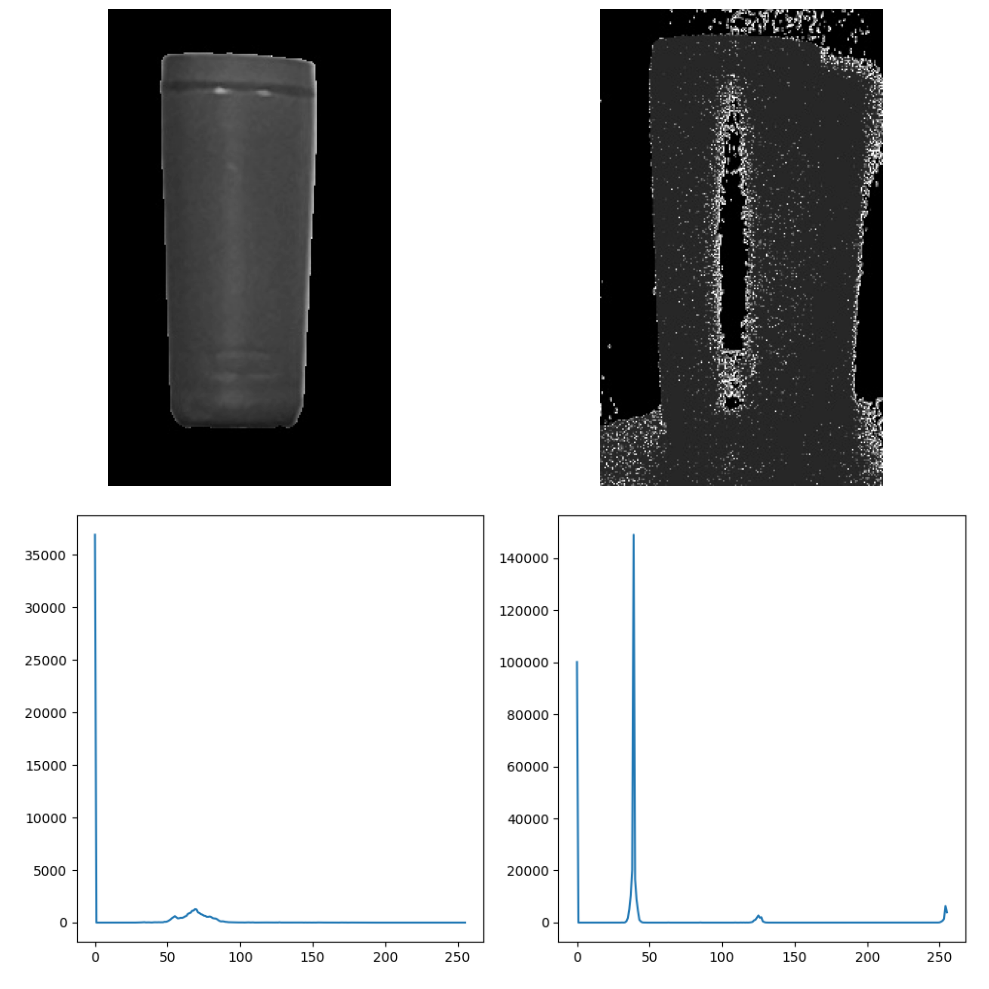

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img1 = mpimg.imread('resized_cropped_flask_cam_domain.jpg')
img2 = mpimg.imread('resized_cropped_flask_event_domain.jpg')
histogram = mpimg.imread('figures/histogram_cam_event.png')

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Remove the space between subplots
plt.subplots_adjust(hspace=0, wspace=0)
axs[0].axis('off')  # Turn off axis
axs[0] = plt.subplot(2,2,1)
axs[0].imshow(img1,cmap='gray')
axs[0].axis('off')  # Turn off axis
axs[0] = plt.subplot(2,2,2)
axs[0].imshow(img2,cmap='gray')
axs[0].axis('off')  # Turn off axis

# Plot the histogram below
axs[1] = plt.subplot(2,1,2)
axs[1].imshow(histogram, aspect='auto')
axs[1].axis('off')  # Turn off axis

# Show the plot
plt.tight_layout()
plt.savefig('figures/cam_event_comparison.png')
plt.show()
